Домашнее задание к лекции "Визуализация данных"
Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах;
данные по фильмам и сериалам Netflix.
Дополнительная часть (необязательная)
построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;
не менее двух визуализаций должны быть интерактивными.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Взят датасет с кеггла про кикстартер - кто, сколько и по каким направлениям краудфандит деньги

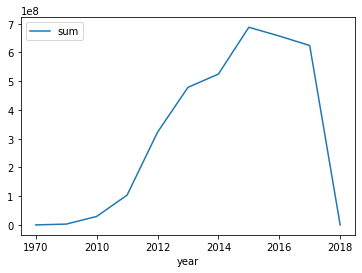

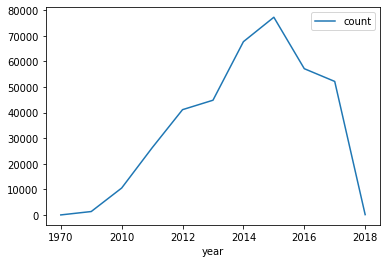

In [47]:
df = pd.read_csv('ks-projects-201801.csv')
df['year'] = df['launched'].str.slice(stop=4)
tmp = df.groupby(['year']).agg({'usd_pledged_real': ['sum'], 'ID': ['count']})
tmp.head()

tmp['usd_pledged_real'].plot(kind='line')
tmp['ID'].plot(kind='line')

В целом, по динамике количества заявок и привлекаемых денег видно, что пик кикстартера пришёлся на 2015 год. Возможно, это связано с появлением других конкурентных площадок, а возможно с тем, что такая форма сбора денег перестала быть актуальной. 

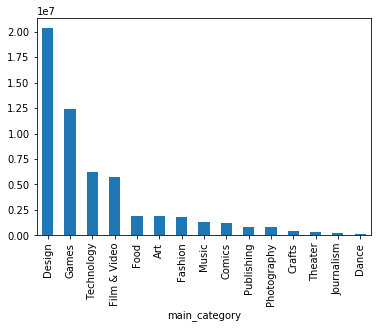

In [3]:
tmp = df.groupby('main_category').agg({'ID': ['count'], 'usd_pledged_real': ['max'], 'backers': ['sum']})
tmp.columns = ['_'.join(col) for col in tmp.columns]
# tmp.info()
tmp.sort_values('backers_sum', ascending=False, inplace=True)
tmp.sort_values('usd_pledged_real_max',ascending=False, inplace=True)
tmp['usd_pledged_real_max'].plot(kind='bar')

Text(0.5, 1.0, 'Суммы, собранные в разрезе категорий')

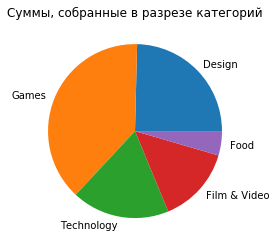

In [4]:
plot = tmp.head(5)['backers_sum'].plot(kind='pie')
plot.set_ylabel('')
plot.set_title('Суммы, собранные в разрезе категорий')

По данным графикам можно сделать вывод о том, что наиболее привлекательными секторми фандинга являются Игры и Дизайн - именно так собирают самое большое количество денег, и именно там рекорды по сборам в рамках одной заявки.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
 15  year              378661 non-null  object 
dtypes: float64(5), int64

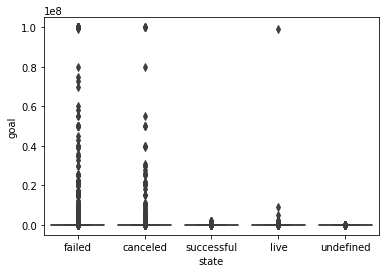

In [18]:
top_countries = df.state.value_counts().sort_values(ascending=False).head().index.values
top_countries
ax = sns.boxplot(x="state", y="goal", 
            data=df[df.state.isin(top_countries)])

Из данного графика можно увидеть, что неудачные стартапы зачастую начинаются с необоснованной цены - чаще всего, люди просят очень много денег, и не собирают их. При этом выбросов вверх по цели среди успешных вообще нет - люди просят разумное количество денег, и получают их. 

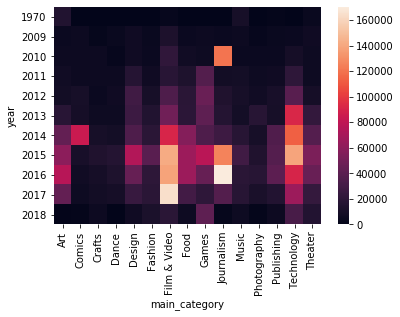

In [45]:
dff = df[df.country=='US']
dff = dff[dff.state!='suspended']

pivot = df.pivot_table(
    index='year',
    columns='main_category',
    values='usd_goal_real',
    aggfunc=np.mean).fillna(0)
pivot
ax = sns.heatmap(pivot)

В среднем больше всего денег хотят стартапы, связанные с кинопроизводствами и технологиями. При этом танцевальные, комиксовые, и фото обычно требуют гораздо меньшего количества денег. 